In [1]:
import glob
import os
import sys
import warnings
from string import ascii_lowercase

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.table import Table
from matplotlib import ticker

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils.plot import set_axis_ticks

# Configuring Plotting Styles & Import Data

## Setup Plotting Styles


In [2]:
cluster_names = [f'LP_2442_gp{i}' for i in range(1, 6)]

plt.rcParams['font.family'] = 'dejavu sans'

plot_colour_dict = {
    'LP_2442_gp1': 'tab:blue',
    'LP_2442_gp2': 'tab:orange',
    'LP_2442_gp3': 'tab:green',
    'LP_2442_gp4': 'tab:red',
    'LP_2442_gp5': 'tab:purple',
    'RV_STD': 'tab:cyan',
    'Telluric_STD': 'tab:brown',
}

plot_marker_dict = {
    'LP_2442_gp1': 'o',
    'LP_2442_gp2': 'o',
    'LP_2442_gp3': 'o',
    'LP_2442_gp4': 'o',
    'LP_2442_gp5': 'o',
    'RV_STD': '^',
    'Telluric_STD': 'x',
}


# Import Data


In [3]:
# import observation summary csv
obs_summary_df = pd.read_csv('../results/2023A023-obs_summary.csv')
obs_summary_df

,group,object,gaia_dr3_id,simbad_alias,ra_deg,dec_deg,extracted_spec_fits,combined_img_fits,flat_fits,wvl_cal_fits,...,snr_mean_order334,snr_std_order334,snr_mean_order335,snr_std_order335,snr_mean_order336,snr_std_order336,snr_mean_order337,snr_std_order337,snr_mean_order338,snr_std_order338
0,LP_2442_gp1,15a1cd81cf4,Gaia DR3 6244019542218710912,LEDA 813843,241.408935,-20.663153,combined_spectra1-4.fits,combined1-4.fits,fname5-9(-24).fits,wavecal10-11(-24).fits,...,34.775701,14.104829,34.226562,13.940857,33.768930,13.781376,30.909235,13.285445,23.041700,13.759404
1,LP_2442_gp1,175e78fa2fa,Gaia DR3 6236273895118889472,CRTS J144750.9-284638,240.713387,-24.032736,combined_spectra12-15.fits,combined12-15.fits,fname5-9(-24).fits,wavecal10-11(-24).fits,...,30.921005,12.475281,30.277340,12.482233,29.321020,12.308373,26.695946,12.128581,19.664008,12.876697
2,Telluric_STD,TelluricSTD,Gaia DR3 6242866601193873536,HD 145188,242.582839,-22.157120,combined_spectra16-18.fits,combined16-18.fits,fname5-9(-24).fits,wavecal10-11(-24).fits,...,140.006293,43.559576,140.783502,43.248988,139.467382,43.362459,137.230834,44.017007,121.211371,53.154971
3,LP_2442_gp1,15a1cd81cf4,Gaia DR3 6244019542218710912,LEDA 813843,241.408935,-20.663153,combined_spectra19-22.fits,combined19-22.fits,fname5-9(-24).fits,wavecal10-11(-24).fits,...,36.589100,14.008386,35.882036,13.974871,35.106861,13.888245,32.391217,13.867980,24.545012,14.338472
4,LP_2442_gp1,16709cdbc1c,Gaia DR3 6242970711201462144,HD 133672,242.520860,-21.542304,combined_spectra23-26.fits,combined23-26.fits,fname5-9(-24).fits,wavecal10-11(-24).fits,...,29.260090,11.958954,28.492809,12.089060,27.650713,11.798599,24.909563,11.874603,17.999666,12.512752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,LP_2442_gp2,2aff1d5e562,Gaia DR3 6050939459221779968,Cl* NGC 6121 ALC 319,246.395987,-23.548719,combined_spectra104-106.fits,combined104-106.fits,flat97-101.fits,wavecal102-103.fits,...,30.926764,13.382482,30.251338,12.637977,29.239004,12.255997,26.470239,11.508358,20.115205,11.776717
60,LP_2442_gp2,246df9c59d2,Gaia DR3 6045698426589461376,Gaia DR2 6036804477037689088,248.692832,-26.109120,combined_spectra107-110.fits,combined107-110.fits,flat97-101.fits,wavecal102-103.fits,...,34.931801,14.947338,34.126838,14.149446,33.089352,14.043686,29.804211,12.684042,22.501575,13.547123
61,LP_2442_gp2,24247745ed7,Gaia DR3 6247323329838233472,Gaia DR2 6233106232175655680,241.034562,-19.124935,combined_spectra111-114.fits,combined111-114.fits,flat97-101.fits,wavecal102-103.fits,...,31.168269,13.915187,30.232908,13.361644,29.028372,12.729345,25.570450,11.682334,17.507675,11.864272
62,Telluric_STD,TelluricSTD,Gaia DR3 6242866601193873536,HD 145188,242.582839,-22.157120,combined_spectra115-118.fits,combined115-118.fits,flat97-101.fits,wavecal102-103.fits,...,148.186760,47.098587,149.853847,46.399846,148.385559,45.899020,146.159010,46.062671,136.253541,48.558877


In [4]:
# import cluster fits files
cluster_fits_dir = '../data/cluster-fits'
cluster_fits_dict = {}
for cluster_name in cluster_names:
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message=".*did not parse as fits unit.*")
        cluster_fits_dict[cluster_name] = Table.read(
            os.path.join(cluster_fits_dir, f'{cluster_name} flagged.fits'))

In [5]:
# import isochrone files
isochrone_file_dir = '../data/isochrones'
isochrone_file_dict = {}
for cluster_name in cluster_names:
    src_gaia_isochrone = ascii.read(glob.glob(
        os.path.join(isochrone_file_dir, f'GAIA {cluster_name}*.txt'))[0])
    src_jhk_isochrone = ascii.read(glob.glob(
        os.path.join(isochrone_file_dir, f'2MASS {cluster_name}*.txt'))[0])

    isochrone_file_dict[cluster_name] = (
        src_gaia_isochrone[src_gaia_isochrone['label'] <= 2],
        src_jhk_isochrone[src_jhk_isochrone['label'] <= 2],
    )

# Visualisation

## Spatial Distribution & CMD


In [6]:
# obs_star_gaia_dr3_id = obs_summary_df[
#     'gaia_dr3_id'].str.replace('Gaia DR3 ', '').astype(int).values

# # mark observed stars
# cluster_obs_dict = {}
# for cluster_name in cluster_names:
#     cluster_table = cluster_fits_dict[cluster_name]

#     cluster_obs_dict[cluster_name] = {
#         'observed': cluster_table[np.isin(cluster_table['source_id'], obs_star_gaia_dr3_id)],
#         'other': cluster_table[~np.isin(cluster_table['source_id'], obs_star_gaia_dr3_id)]
#     }
#     print(f'{cluster_name} has {len(cluster_obs_dict[cluster_name]["observed"])} stars observed')

# fig = plt.figure(figsize=(15, 13), dpi=300)
# grid = fig.add_gridspec(nrows=27, ncols=30, hspace=0, wspace=0)

# xy_ax = fig.add_subplot(grid[:9, :9])
# xz_ax = fig.add_subplot(grid[:9, 12:21])
# yz_ax = fig.add_subplot(grid[:9, 21:])
# gaia_cmd_axes = [fig.add_subplot(grid[11:18, 6 * i:6 * (i + 1)]) for i in range(5)]
# jhk_cmd_axes = [fig.add_subplot(grid[20:, 6 * i:6 * (i + 1)]) for i in range(5)]

# # Cartesian distributions
# plot_range_dict = {
#     'X': (95, 175),
#     'Y': (-50, 30),
#     'Z': (10, 90),
# }
# tick_locator_dict = {
#     'X': (plt.MultipleLocator(30, offset=15), plt.MultipleLocator(5)),
#     'Y': (plt.MultipleLocator(30, offset=20), plt.MultipleLocator(5)),
#     'Z': (plt.MultipleLocator(30, offset=20), plt.MultipleLocator(5)),
# }

# for axis, (x_label, y_label) in zip(
#         [xy_ax, xz_ax, yz_ax], [('X', 'Y'), ('X', 'Z'), ('Y', 'Z')]
# ):
#     for cluster_name in cluster_names:
#         data = cluster_obs_dict[cluster_name]
#         axis.scatter(
#             data['other'][f'{x_label}_cor'], data['other'][f'{y_label}_cor'],
#             marker=plot_marker_dict[cluster_name], s=8,
#             ec='None', fc=plot_colour_dict[cluster_name], alpha=.15,
#             label=cluster_name.replace('_', ' ')
#         )
#         axis.scatter(
#             data['observed'][f'{x_label}_cor'], data['observed'][f'{y_label}_cor'],
#             marker=plot_marker_dict[cluster_name], s=16,
#             ec='k', fc=plot_colour_dict[cluster_name], alpha=.8,
#             label=f'observed {cluster_name.replace("_", " ")}'
#         )
#     axis.set_xlabel(f'{x_label} [pc]', fontsize='x-large')
#     axis.set_xlim(plot_range_dict[x_label])
#     axis.xaxis.set_major_locator(tick_locator_dict[x_label][0])
#     axis.xaxis.set_minor_locator(tick_locator_dict[x_label][1])

#     axis.set_ylabel(f'{y_label} [pc]', fontsize='x-large')
#     axis.set_ylim(plot_range_dict[y_label])
#     axis.yaxis.set_major_locator(tick_locator_dict[y_label][0])
#     axis.yaxis.set_minor_locator(tick_locator_dict[y_label][1])

# # CMD plots
# for gaia_ax, jhk_ax, cluster_name in zip(
#         gaia_cmd_axes, jhk_cmd_axes, cluster_names):
#     data = cluster_obs_dict[cluster_name]
#     gaia_ax.text(0.95, 0.95, cluster_name.replace('_', ' '), fontsize='large',
#                  ha='right', va='top', transform=gaia_ax.transAxes)
#     gaia_ax.scatter(
#         data['other']['phot_bp_mean_mag'] - data['other']['phot_rp_mean_mag'],
#         data['other']['phot_g_mean_mag'] - 5 * np.log10(1000 / data['other']['parallax']) + 5,
#         marker=plot_marker_dict[cluster_name], s=8,
#         ec='None', fc=plot_colour_dict[cluster_name], alpha=0.15
#     )
#     gaia_ax.scatter(
#         data['observed']['phot_bp_mean_mag'] - data['observed']['phot_rp_mean_mag'],
#         data['observed']['phot_g_mean_mag'] - 5 * np.log10(1000 / data['observed']['parallax']) + 5,
#         marker=plot_marker_dict[cluster_name], s=16,
#         ec='k', fc=plot_colour_dict[cluster_name], alpha=0.8
#     )
#     gaia_isochrone, jhk_isochrone = isochrone_file_dict[cluster_name]
#     gaia_ax.plot(
#         gaia_isochrone['G_BPmag'] - gaia_isochrone['G_RPmag'],
#         gaia_isochrone['Gmag'], ls='-', lw=1, c='k',
#         label='8 Myr\n$\\mathrm{A_V}=0$\nZ=0.0152'
#     )
#     gaia_ax.legend(loc='center right', fontsize='medium')

#     for axis in [gaia_ax, jhk_ax]:
#         axis.set_xlim(-1, 5)
#         axis.xaxis.set_major_locator(plt.MultipleLocator(2))
#         axis.xaxis.set_minor_locator(plt.MultipleLocator(1))

#         axis.set_ylim(-2, 14)
#         axis.invert_yaxis()
#         axis.yaxis.set_major_locator(plt.MultipleLocator(4))
#         axis.yaxis.set_minor_locator(plt.MultipleLocator(1))

# fig.text(.5, .08, r'${G}_\mathrm{BP}-{G}_\mathrm{RP}$ [mag]', fontsize='x-large',
#          va='top', ha='center')
# gaia_cmd_axes[0].set_ylabel(r'$\mathrm{M}_{G}$ [mag]', fontsize='x-large')

# axis_tick_config_dict = {
#     xy_ax: {},
#     xz_ax: {},
#     yz_ax: {'y_tick_label_position': 'right', 'y_label_position': 'right'},
#     **{axes[0]: {},
#        **{axes[i]: {'y_tick_label_position': 'none'} for i in range(1, 4)},
#        axes[-1]: {'y_tick_label_position': 'right'}
#        for axes in [gaia_cmd_axes, jhk_cmd_axes]}
# }
# for axis in [xy_ax, xz_ax, yz_ax, *gaia_cmd_axes]:
#     set_axis_ticks(axis, **axis_tick_config_dict.get(axis, {}))
#     axis.tick_params(labelsize='large')

## SNR distribution


In [7]:
full_orders = range(299, 339)

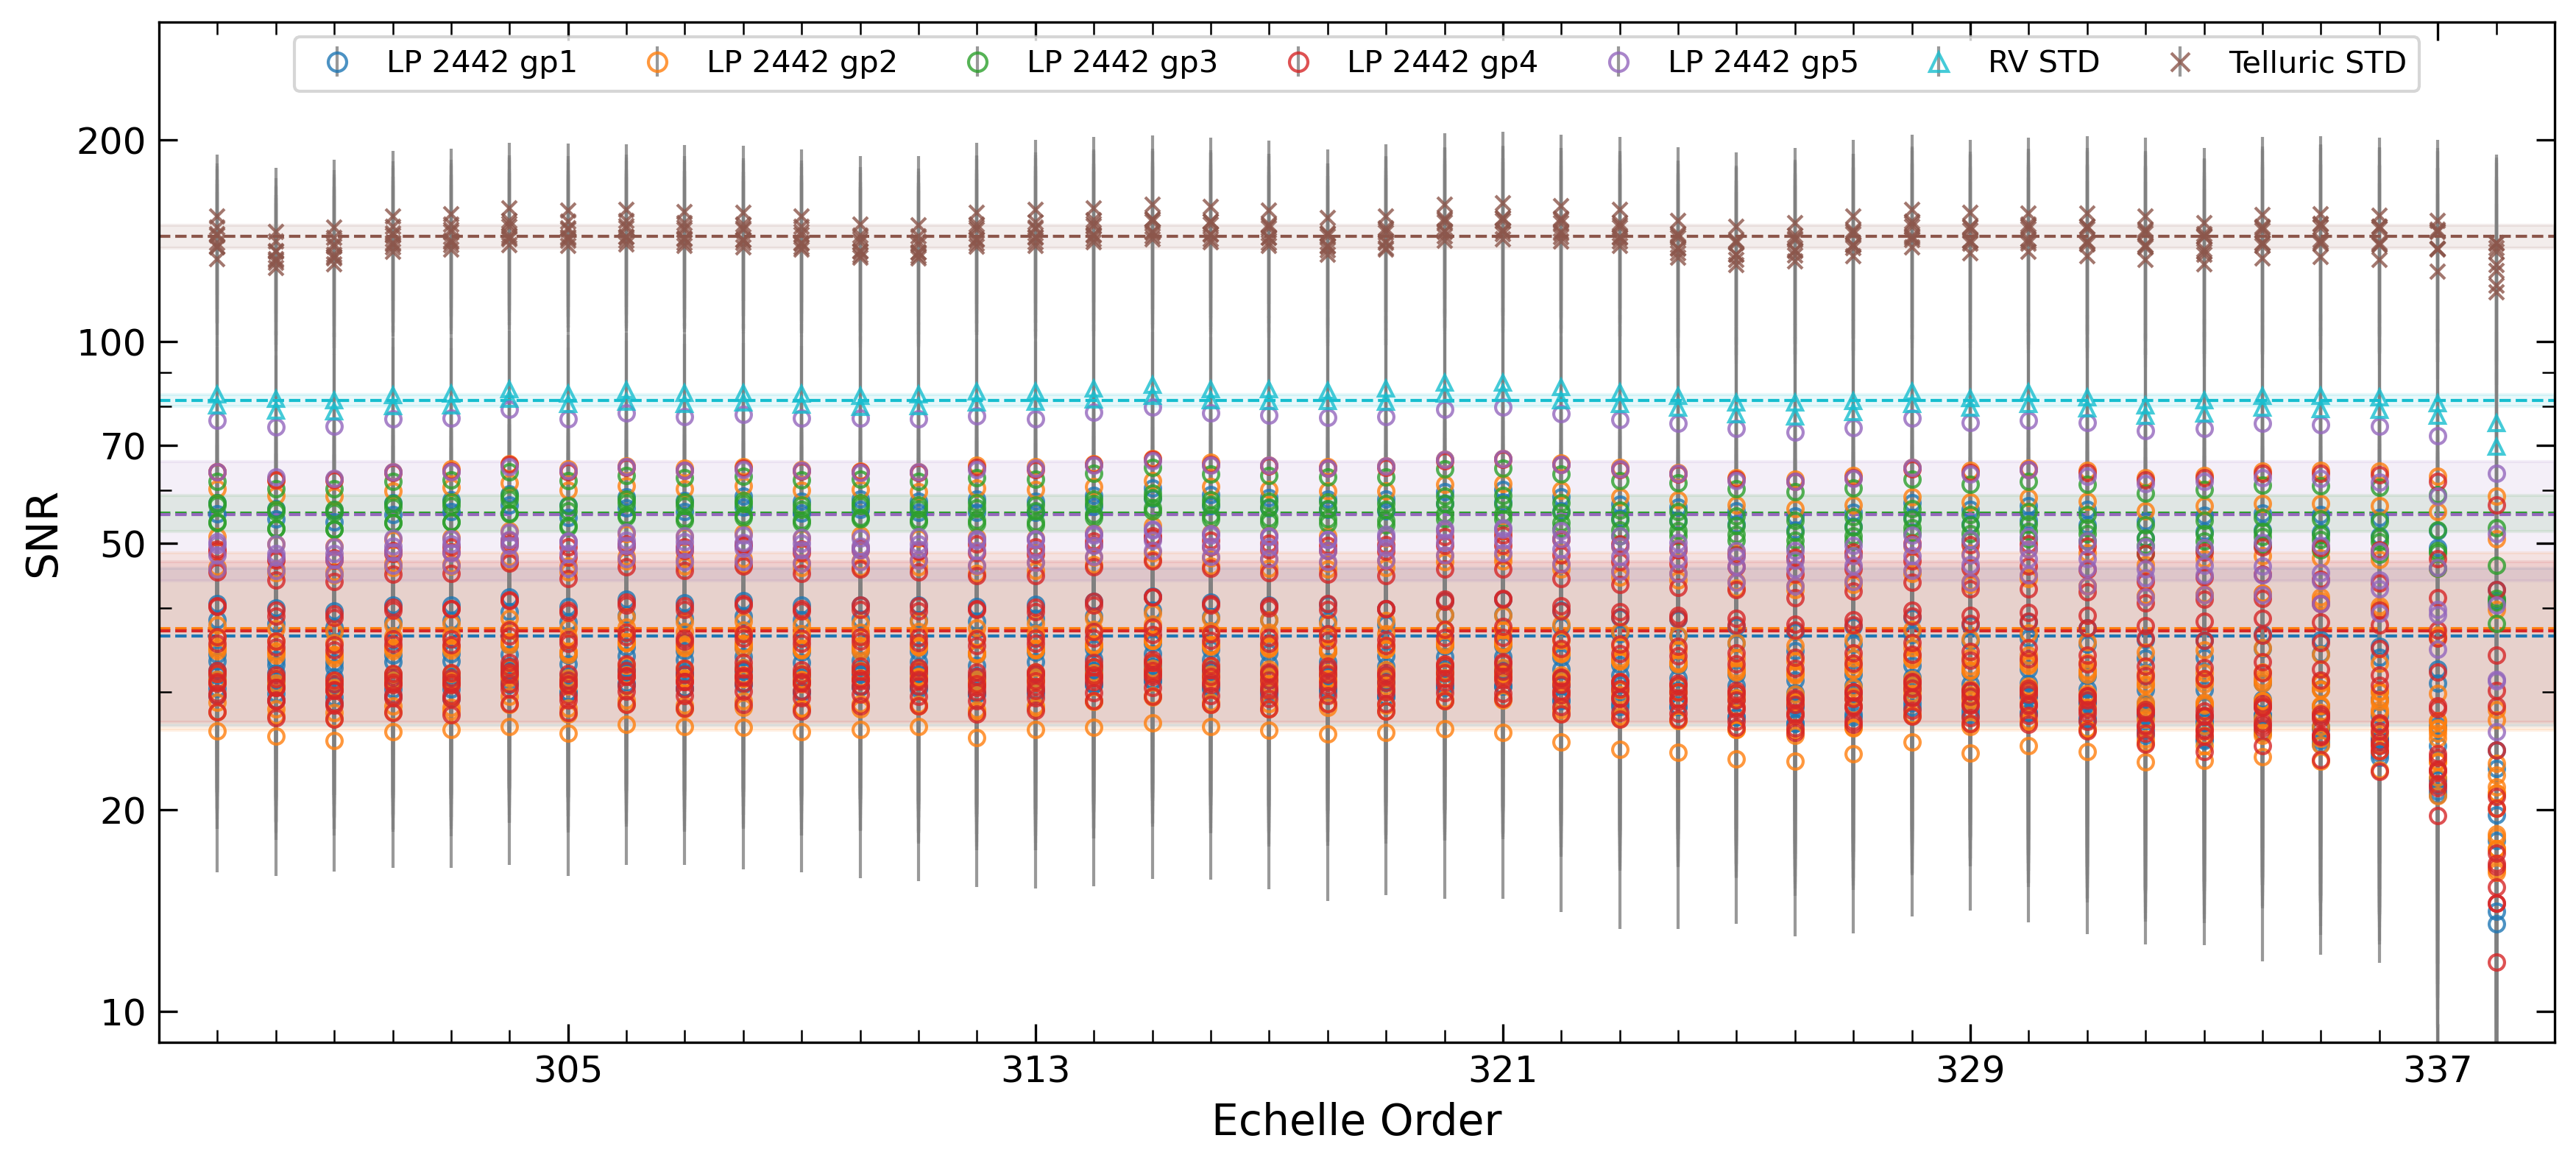

In [8]:
fig, axis = plt.subplots(1, 1, figsize=(14, 6), dpi=300)

set_axis_ticks(axis)
# plot the SNR by order, using the same colour for the same group
for group_name, group_df in obs_summary_df.groupby('group'):
    for order in full_orders:
        snr = group_df[f'snr_mean_order{order}']
        snr_err = group_df[f'snr_std_order{order}']
        axis.errorbar(
            np.full_like(snr, order), snr, yerr=snr_err,
            fmt=plot_marker_dict[group_name],
            mfc='none', mec=plot_colour_dict[group_name], alpha=.8, mew=1, ms=5,
            ecolor='gray', elinewidth=1, capsize=0,
            label=group_name.replace('_', ' ')
        )
    # plot the mean snr across all orders with std shaded
    snr_full_orders = group_df[[f'snr_mean_order{order}' for order in full_orders]].mean(axis=1)
    axis.axhline(np.mean(snr_full_orders), ls='--', lw=1, c=plot_colour_dict[group_name])
    axis.axhspan(np.mean(snr_full_orders) - np.std(snr_full_orders),
                 np.mean(snr_full_orders) + np.std(snr_full_orders),
                 color=plot_colour_dict[group_name], alpha=.1)

axis.legend(
    *[*zip(*{l: h for h, l in zip(*axis.get_legend_handles_labels())}.items())][::-1],
    ncol=obs_summary_df['group'].nunique(), loc='upper center',
    prop={'size': 10}, markerscale=1.2,
    columnspacing=1.6, handletextpad=.6
)

axis.tick_params(labelsize=12)

axis.set_xlabel('Echelle Order', fontsize=14)
axis.set_xlim(298, 339)
axis.xaxis.set_major_locator(plt.MultipleLocator(8, offset=1))
axis.xaxis.set_minor_locator(plt.MultipleLocator(1))

axis.set_ylabel('SNR', fontsize=14)
axis.set_ylim(9, 300)
axis.set_yscale('log')
axis.set_yticks([10, 20, 50, 70, 100, 200])
axis.get_yaxis().set_major_formatter(ticker.ScalarFormatter())


Text(0.5, 0.9, 'SNR Distribution by Echelle Order')

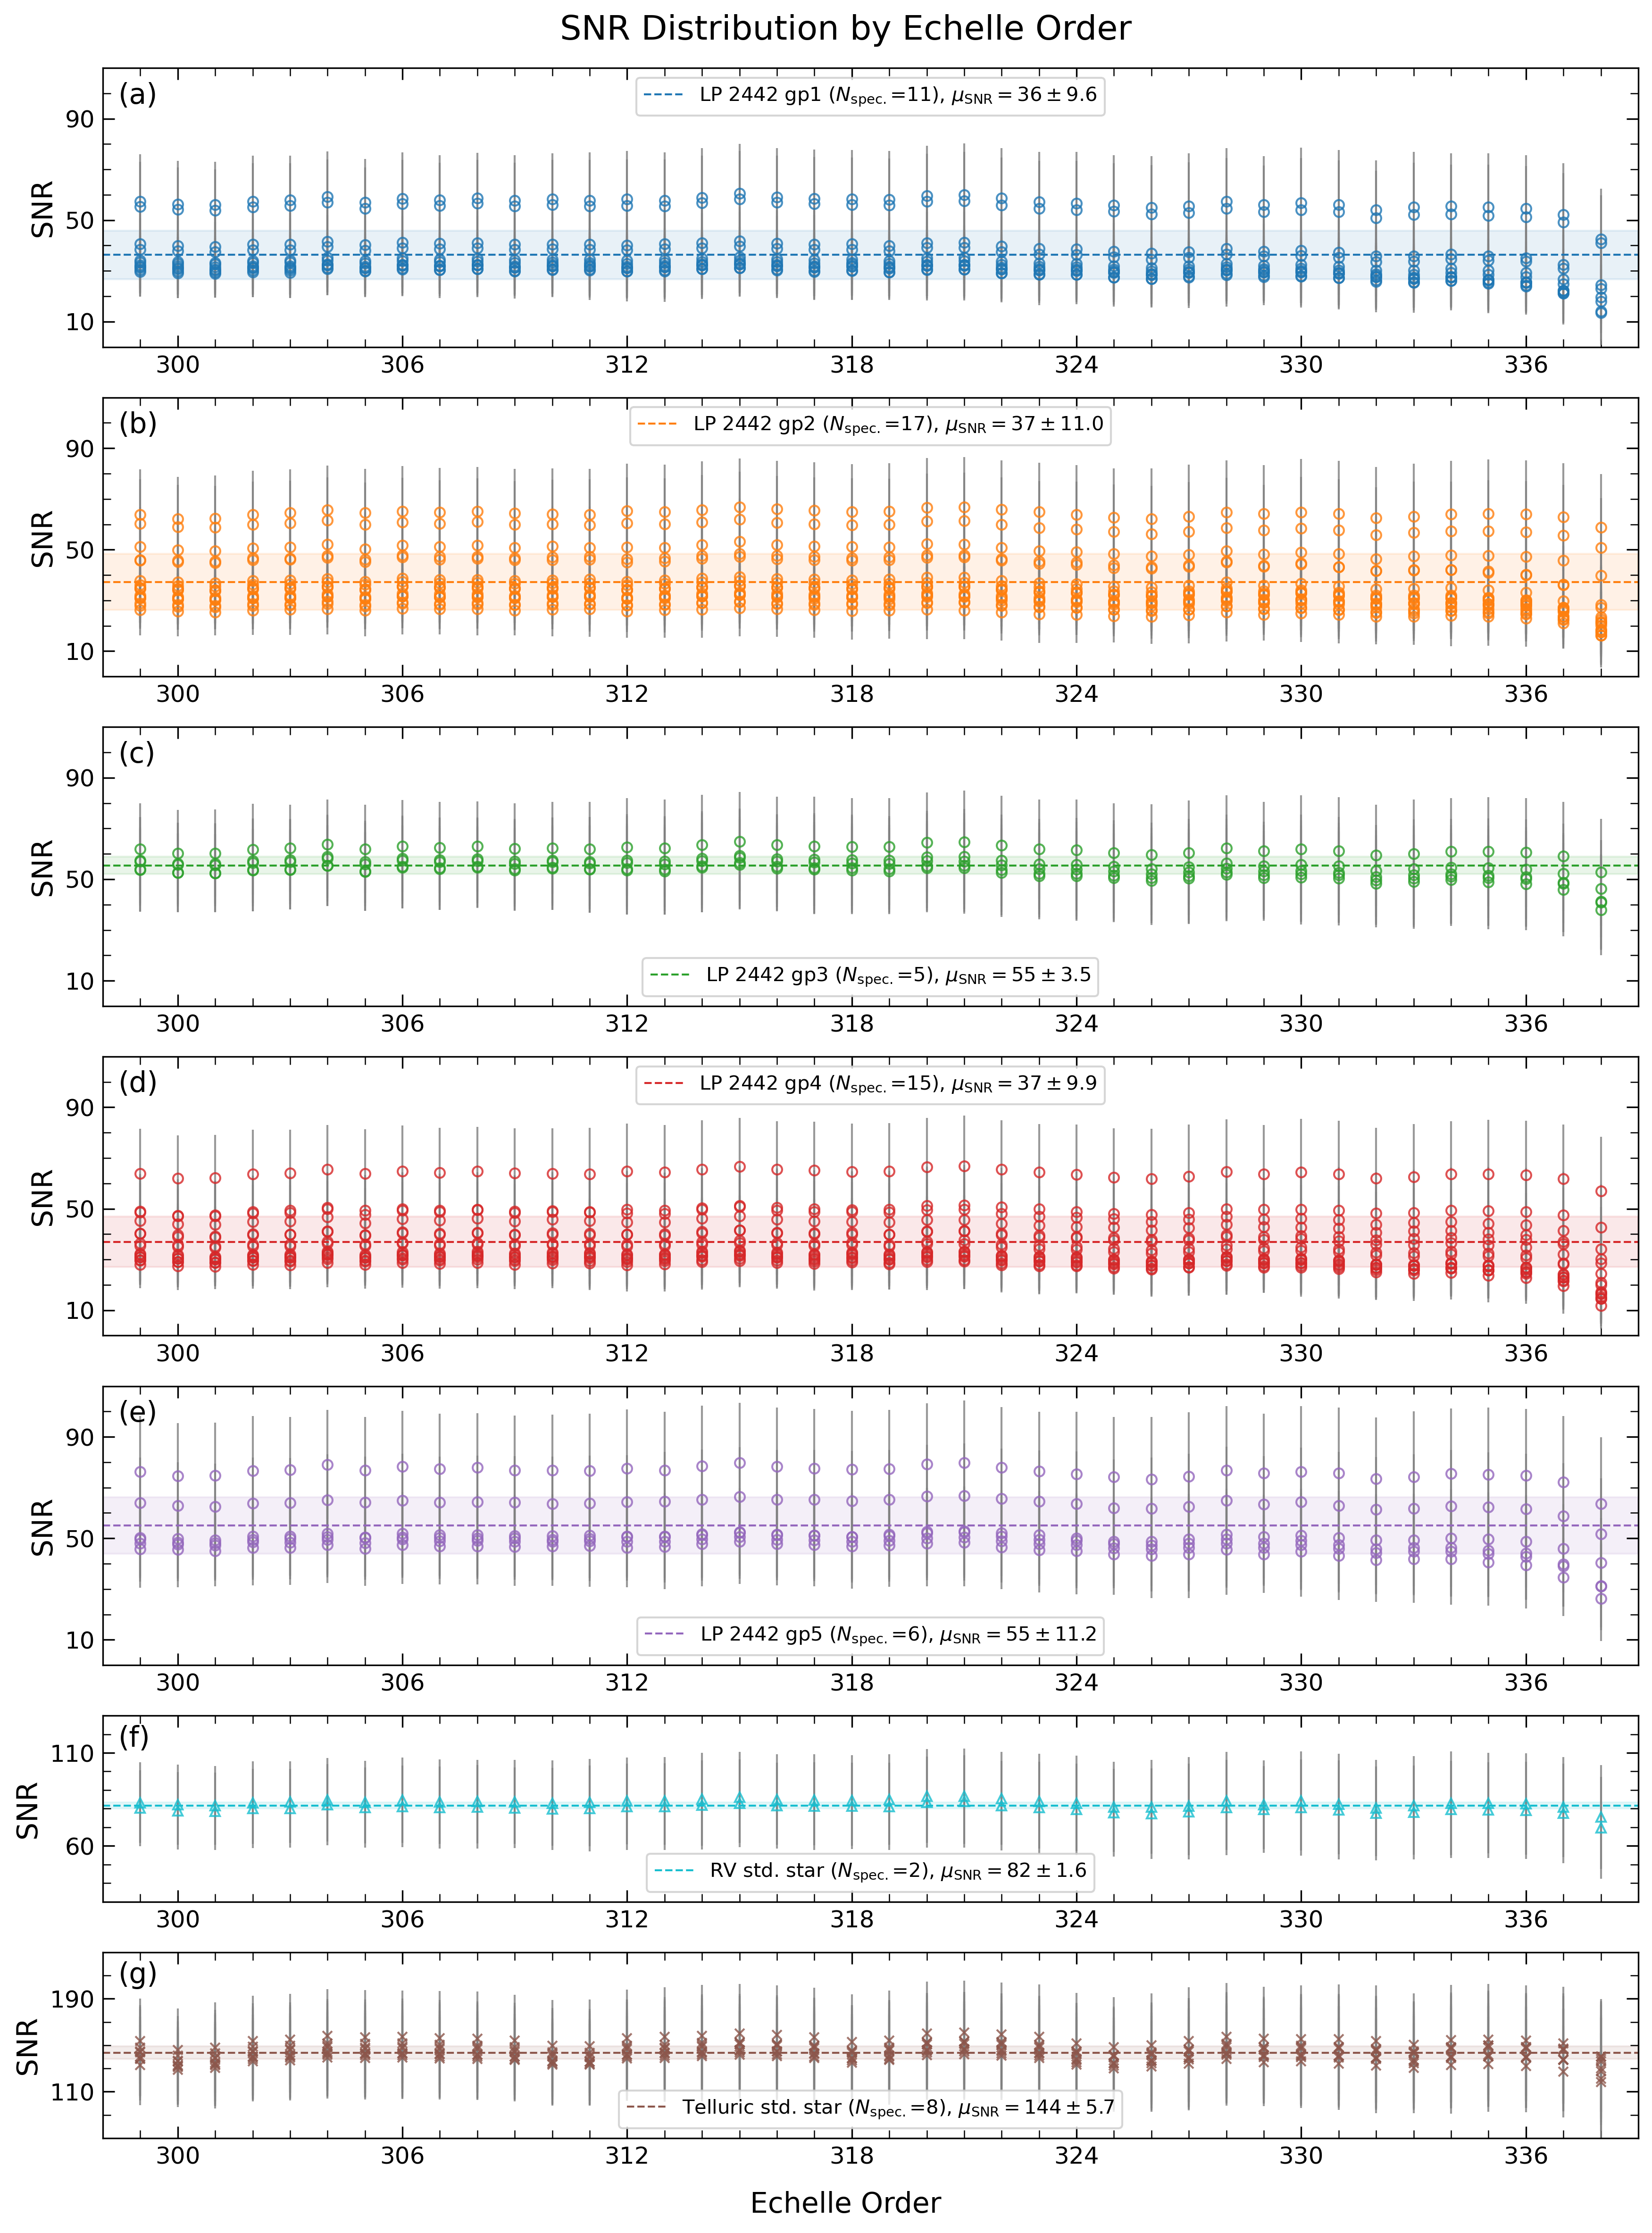

In [11]:
fig, axes = plt.subplots(
    nrows=7, ncols=1, figsize=(14, 19), dpi=300,
    height_ratios=[3, 3, 3, 3, 3, 2, 2], gridspec_kw={'hspace': .2},
)

for axis, name in zip(axes, [*cluster_names, 'RV_STD', 'Telluric_STD']):
    group_df = obs_summary_df[obs_summary_df['group'] == name]
    for order in full_orders:
        snr = group_df[f'snr_mean_order{order}']
        snr_err = group_df[f'snr_std_order{order}']
        # plot the SNR by order, using the same colour for the same group
        axis.errorbar(
            x=np.full_like(snr, order), y=snr, yerr=snr_err,
            fmt=plot_marker_dict[name], mfc='none', mec=plot_colour_dict[name],
            alpha=.8, mew=1, ms=5, ecolor='gray', elinewidth=1, capsize=0,
        )

    # plot the mean snr across all orders with std shaded
    snr_full_orders = group_df[[f'snr_mean_order{order}' for order in full_orders]].mean(axis=1)
    axis.axhline(np.mean(snr_full_orders), ls='--', lw=1, c=plot_colour_dict[name],
                 label=f'{name.replace("_", " ").replace("STD", "std. star")} '
                       f'($N_\mathrm{{spec.}}$={len(group_df)}), $\mu_\mathrm{{SNR}}='
                       f'{np.mean(snr_full_orders):.0f}\pm{np.std(snr_full_orders):.1f}$')
    axis.axhspan(np.mean(snr_full_orders) - np.std(snr_full_orders),
                 np.mean(snr_full_orders) + np.std(snr_full_orders),
                 color=plot_colour_dict[name], alpha=.1)
    axis.legend(
        *[*zip(*{l: h for h, l in zip(*axis.get_legend_handles_labels())}.items())][::-1],
        loc='upper center' if name in [f'LP_2442_gp{i}' for i in [1, 2, 4]] else 'lower center',
        prop={'size': 'medium'}, markerscale=1.2,
    )

for idx, axis in enumerate(axes):
    set_axis_ticks(axis)
    axis.tick_params(axis='both', labelsize='large')

    axis.text(.01, .95, f'({ascii_lowercase[idx]})', fontsize='x-large',
              va='top', ha='left', transform=axis.transAxes)

    axis.set_xlim(298, 339)
    axis.xaxis.set_major_locator(plt.MultipleLocator(6))
    axis.xaxis.set_minor_locator(plt.MultipleLocator(1))

    axis.set_ylabel('SNR', fontsize='x-large')
    if axis in axes[:-2]:
        axis.set_ylim(0, 110)
        axis.yaxis.set_major_locator(plt.MultipleLocator(40, offset=10))
        axis.yaxis.set_minor_locator(plt.MultipleLocator(10))
    elif axis == axes[-2]:
        axis.set_ylim(30, 130)
        axis.yaxis.set_major_locator(plt.MultipleLocator(50, offset=10))
        axis.yaxis.set_minor_locator(plt.MultipleLocator(10))
    else:
        axis.set_ylim(70, 230)
        axis.yaxis.set_major_locator(plt.MultipleLocator(80, offset=30))
        axis.yaxis.set_minor_locator(plt.MultipleLocator(20, offset=30))

fig.supxlabel('Echelle Order', fontsize='x-large', y=.08)
fig.suptitle('SNR Distribution by Echelle Order', fontsize='xx-large', y=.9)

Text(0.5, 1, 'Mean SNR for Orders 301-336')

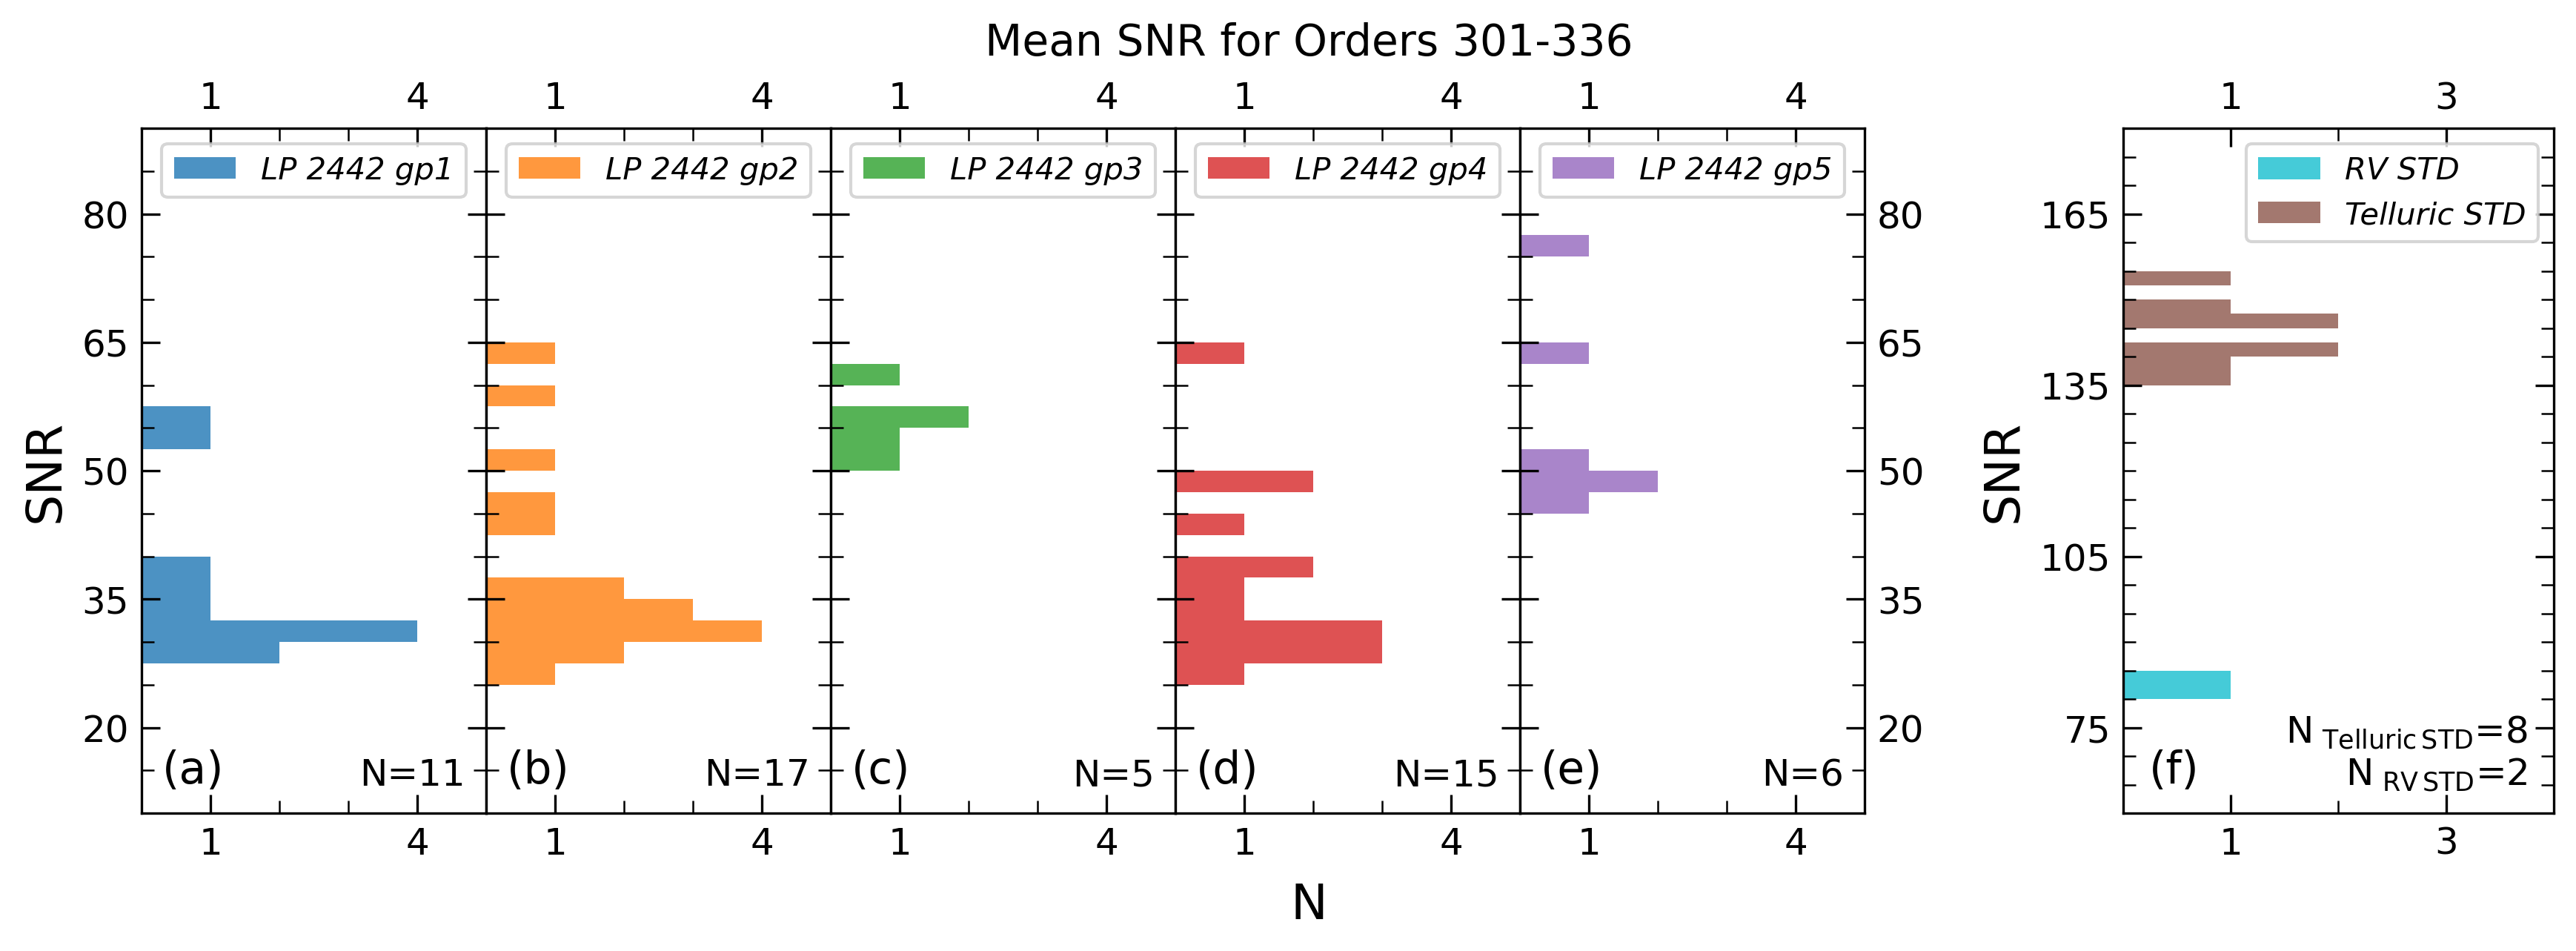

In [10]:
fig = plt.figure(figsize=(14, 4), dpi=300)
grid = fig.add_gridspec(nrows=1, ncols=28, hspace=0, wspace=0)

cluster_axes = [fig.add_subplot(grid[:, 4 * i:4 * (i + 1)]) for i in range(0, 5)]
std_stars_ax = fig.add_subplot(grid[:, 23:])

hist_bins = np.arange(0, 300, 2.5)

# plot the histogram of mean SNR of orders 301-336 for each group
for idx, (group_name, group_df) in enumerate(obs_summary_df.groupby('group')):
    snr_in_specified_orders = group_df[
        [f'snr_mean_order{order}' for order in range(301, 337)]].mean(axis=1)
    if group_name not in ['RV_STD', 'Telluric_STD']:
        axis = cluster_axes[idx]
        axis.hist(
            snr_in_specified_orders, bins=hist_bins,
            color=plot_colour_dict[group_name], alpha=.8, label=group_name.replace('_', ' '),
            orientation='horizontal'
        )
        axis.text(.94, .03, f'N={len(group_df)}',
                  ha='right', va='bottom', transform=axis.transAxes, fontsize=12)

    else:
        std_stars_ax.hist(
            snr_in_specified_orders, bins=hist_bins,
            color=plot_colour_dict[group_name], alpha=.8, label=group_name.replace('_', ' '),
            orientation='horizontal'
        )
std_stars_ax.text(
    .94, .03,
    f'N$_{{\,\mathrm{{\, Telluric\, STD}}}}$='
    f'{len(obs_summary_df[obs_summary_df["group"] == "Telluric_STD"])}\n'
    f'N$_{{\,\mathrm{{\, RV\, STD}}}}$='
    f'{len(obs_summary_df[obs_summary_df["group"] == "RV_STD"])}',
    ha='right', va='bottom', transform=std_stars_ax.transAxes, fontsize=12
)

# set axis labels and ticks
cluster_axes[0].set_ylabel('SNR', fontsize=16)
std_stars_ax.set_ylabel('SNR', fontsize=16)

axis_tick_config_dict = {
    **{axis: {'x_tick_label_position': 'both', 'y_tick_label_position': 'none'}
       for axis in cluster_axes[1:-1]},
    cluster_axes[0]: {'x_tick_label_position': 'both', 'y_tick_label_position': 'left'},
    cluster_axes[-1]: {'x_tick_label_position': 'both', 'y_tick_label_position': 'right'},
    std_stars_ax: {'x_tick_label_position': 'both', 'y_tick_label_position': 'left'},
}

for idx, axis in enumerate([*cluster_axes, std_stars_ax]):
    set_axis_ticks(axis, **axis_tick_config_dict.get(axis, {}))
    axis.tick_params(axis='both', labelsize=12)

    axis.text(.06, .03, f'({ascii_lowercase[idx]})', fontsize='x-large',
              va='bottom', ha='left', transform=axis.transAxes)

    axis.legend(loc='upper ' + ('center' if axis in cluster_axes else 'right'),
                prop={'size': 10, 'style': 'italic'}, markerscale=1.2)

    if axis in cluster_axes:
        axis.set_xlim(0, 5)
        axis.xaxis.set_major_locator(plt.MultipleLocator(3, offset=1))
        axis.xaxis.set_minor_locator(plt.MultipleLocator(1))

        axis.set_ylim(10, 90)
        axis.yaxis.set_major_locator(plt.MultipleLocator(15, offset=5))
        axis.yaxis.set_minor_locator(plt.MultipleLocator(5))
    else:
        axis.set_xlim(0, 4)
        axis.xaxis.set_major_locator(plt.MultipleLocator(2, offset=1))
        axis.xaxis.set_minor_locator(plt.MultipleLocator(1))

        axis.set_ylim(60, 180)
        axis.yaxis.set_major_locator(plt.MultipleLocator(30, offset=15))
        axis.yaxis.set_minor_locator(plt.MultipleLocator(5))

fig.supxlabel('N', fontsize=16, y=-.02)
fig.suptitle('Mean SNR for Orders 301-336', fontsize=14, y=1)